In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy import stats
import matplotlib.ticker as ticker

In [112]:
data = pd.read_excel('data.xlsx')
I_al = np.array(data['I, частиц/c.1'].dropna()[:10], dtype=np.float64)
N_al = np.array(data['N-Nф, частиц.1'].dropna()[:10], dtype=np.float64)
t_al = np.array(data['t, c.1'].dropna()[:10], dtype=np.float64)
er_al = np.sqrt(N_al)/t_al
l = np.array(data['suml, см.1'].dropna()[:10], dtype=np.float64)
dl_al = np.array(data['l_i, см.1'].dropna()[1:10], dtype = np.float64).std()
dl_al


0.014229164972072956

In [113]:
N_pb =  np.array(data['N-Nф, частиц'].dropna()[:10], dtype=np.float64)
I_pb = np.array(data['I, частиц/c'].dropna()[:10], dtype=np.float64)
l_pb= np.array(data['suml, см'].dropna()[:10], dtype=np.float64)
t_pb = np.array(data['t, c'].dropna()[:10], dtype=np.float64)
er_pb = np.sqrt(N_pb)/t_pb
dl_pb = np.array(data['l_i, см'].dropna()[1:10], dtype = np.float64).std()
dl_pb


0.016329931618554522

In [31]:
N_fe = np.array(data['N-Nф, частиц.2'].dropna()[:10], dtype=np.float64)
l_fe= np.array(data['suml, см.2'].dropna()[:10], dtype=np.float64)
I_fe = np.array(data['I, частиц/c.2'].dropna()[:10], dtype=np.float64)
t_fe = np.array(data['t, c.2'].dropna()[:10], dtype=np.float64)
er_fe = np.sqrt(N_fe)/t_fe
dl_fe = np.array(data['l_i, см.2'].dropna()[1:10], dtype = np.float64).std()
dl_fe


0.009428090415820642

a =  -0.2354977660058506
b =  9.740056688970085
sigma_a =  0.005286781510627314
sigma_b =  0.034411782321700404
S_e =  0.10366769057406121
Relative S_r a = %  2.24493913479246
Relative S_r b = %  0.3533016636409239


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:57: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later


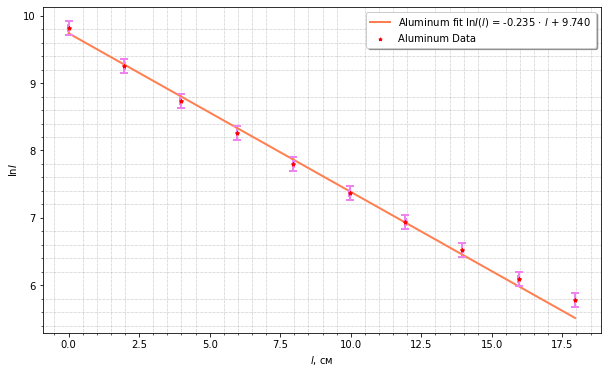

In [50]:
def approx(x, a, b):
    return a * x + b
beta_opt1, beta_cov1 = curve_fit(approx, l, np.log(I_al), sigma = er_al/I_al)
a = beta_opt1[0]
b = beta_opt1[1]


print('a = ', a)
print('b = ', b)



#получим погрешности для коэффициентов
sigma_a = np.sqrt(beta_cov1[0,0])
sigma_b = np.sqrt(beta_cov1[1,1])


print('sigma_a = ', sigma_a)
print('sigma_b = ', sigma_b)


residuals1 = np.log(I_al) - approx(l,*beta_opt1)
fres1 = sum(residuals1**2)
S_e = np.sqrt(fres1/len(l))
print('S_e = ', S_e)


print('Relative S_r a = % ', 100* sigma_a/abs(a))
print('Relative S_r b = % ', 100* sigma_b/abs(b))


# график
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(l, approx(l, *beta_opt1), 'coral', lw = 2)
ax.scatter(l, np.log(I_al), marker = '*', color = 'red', s = 10)
lgnd = ax.legend([r'Aluminum fit $\ln{I}(l)$ = %.3f $\cdot$ $l$ + %.3f ' %(a,b), 'Aluminum Data'], loc='upper right', shadow=True)

# ax.set_title(r'График Ферми')
ax.set_ylabel(r'$\ln{I}$')
ax.set_xlabel(r'$l$, см')

ax.grid(which='major', color = 'k')

ax.minorticks_on()

ax.grid(which='minor',
color = 'gray',
linestyle = ':', linewidth = 0.5)

ax.grid(which='major', linewidth = 0.5)
plt.errorbar(l, np.log(I_al), fmt = 'ro', marker = '*', markersize = '4', xerr = dl_al, yerr = S_e, capsize = 4, elinewidth = 2, capthick = 2, ecolor = 'violet')


# plt.xlim (-10, 850)
# plt.ylim (-10, 245)
plt.savefig('Al.png', dpi=400, quality=100)
plt.show()

a =  -1.1686267724857944
b =  9.643691028005476
sigma_a =  0.05344251427834675
sigma_b =  0.09108811989188276
S_e =  0.2536792230337945
Relative S_r a = %  4.573103709122528
Relative S_r b = %  0.9445358590124984


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:59: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later


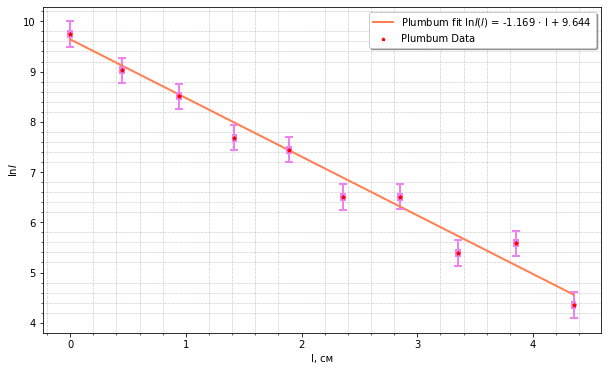

In [115]:
def approx(x, a, b):
    return a * x + b
beta_opt1, beta_cov1 = curve_fit(approx, l_pb, np.log(I_pb), sigma = er_pb/I_pb)
a = beta_opt1[0]
b = beta_opt1[1]


print('a = ', a)
print('b = ', b)



#получим погрешности для коэффициентов
sigma_a = np.sqrt(beta_cov1[0,0])
sigma_b = np.sqrt(beta_cov1[1,1])


print('sigma_a = ', sigma_a)
print('sigma_b = ', sigma_b)


residuals1 = np.log(I_pb) - approx(l_pb,*beta_opt1)
fres1 = sum(residuals1**2)
S_e = np.sqrt(fres1/len(l_pb))
print('S_e = ', S_e)


print('Relative S_r a = % ', 100* sigma_a/abs(a))
print('Relative S_r b = % ', 100* sigma_b/abs(b))



# график
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(l_pb, approx(l_pb, *beta_opt1), 'coral', lw = 2)
ax.scatter(l_pb, np.log(I_pb), marker = '*', color = 'red', s = 10)
lgnd = ax.legend([r'Plumbum fit $\ln{I}(l)$ = %.3f $\cdot$ l + %.3f ' %(a,b), 'Plumbum Data'], loc='upper right', shadow=True)

# ax.set_title(r'График Ферми')
ax.set_ylabel(r'$\ln{I}$')
ax.set_xlabel(r'l, см')

ax.grid(which='major',
color = 'k')

ax.minorticks_on()

ax.grid(which='minor',
color = 'gray',
linestyle = ':', linewidth = 0.5)

ax.grid(which='major', linewidth = 0.5)
plt.errorbar(l_pb, np.log(I_pb), fmt = 'ro', marker = '*', markersize = '4', xerr = dl_pb, yerr = S_e, capsize = 4, elinewidth = 2, capthick = 2, ecolor = 'violet')


# plt.xlim (-10, 850)
# plt.ylim (-10, 245)
plt.savefig('Pb.png', dpi=400, quality=100)
plt.show()

a =  -0.6451972051926106
b =  9.782084263948946
sigma_a =  0.013308686969801219
sigma_b =  0.03397435164899123
S_e =  0.14954156945828329
Relative S_r a = %  2.062731652073443
Relative S_r b = %  0.34731199131253515


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:59: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later


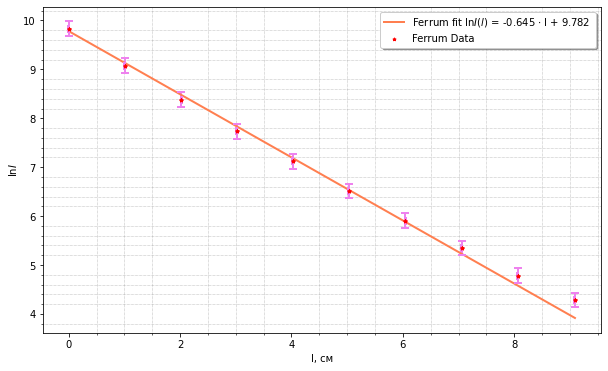

In [83]:
def approx(x, a, b):
    return a * x + b
beta_opt1, beta_cov1 = curve_fit(approx, l_fe, np.log(I_fe), sigma = er_fe/I_fe)
a = beta_opt1[0]
b = beta_opt1[1]


print('a = ', a)
print('b = ', b)



#получим погрешности для коэффициентов
sigma_a = np.sqrt(beta_cov1[0,0])
sigma_b = np.sqrt(beta_cov1[1,1])


print('sigma_a = ', sigma_a)
print('sigma_b = ', sigma_b)


residuals1 = np.log(I_fe) - approx(l_fe,*beta_opt1)
fres1 = sum(residuals1**2)
S_e = np.sqrt(fres1/len(l_fe))
print('S_e = ', S_e)


print('Relative S_r a = % ', 100* sigma_a/abs(a))
print('Relative S_r b = % ', 100* sigma_b/abs(b))



# график
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(l_fe, approx(l_fe, *beta_opt1), 'coral', lw = 2)
ax.scatter(l_fe, np.log(I_fe), marker = '*', color = 'red', s = 10)
lgnd = ax.legend([r'Ferrum fit $\ln{I}(l)$ = %.3f $\cdot$ l + %.3f ' %(a,b), 'Ferrum Data'], loc='upper right', shadow=True)

# ax.set_title(r'График Ферми')
ax.set_ylabel(r'$\ln{I}$')
ax.set_xlabel(r'l, см')

ax.grid(which='major',
color = 'k')

ax.minorticks_on()

ax.grid(which='minor',
color = 'gray',
linestyle = ':', linewidth = 0.5)

ax.grid(which='major', linewidth = 0.5)
plt.errorbar(l_fe, np.log(I_fe), fmt = 'ro', marker = '*', markersize = '4', xerr = dl_fe, yerr = S_e, capsize = 4, elinewidth = 2, capthick = 2, ecolor = 'violet')


# plt.xlim (-10, 850)
# plt.ylim (-10, 245)
plt.savefig('Fe.png', dpi=400, quality=100)
plt.show()

In [67]:
data
e = data['e'][:30]
al = data['al'][:30]
fe = data['fe'][:30]
pb = data['pb'][:30]

a =  0.053008465423099733
b =  -0.00213915187435066
c =  -0.023583192473804183
d =  0.1416433491035226
sigma_a =  0.0071875395721355375
sigma_b =  0.0006363467308798724
sigma_c =  0.005405409256631253
sigma_d =  0.014306777121505295
S_e =  0.012269883125917511
Relative S_r a = %  13.559229671650504
Relative S_r b = %  29.747618133613614
Relative S_r c = %  22.920600180130368
Relative S_r d = %  10.10056399545377


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:68: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later


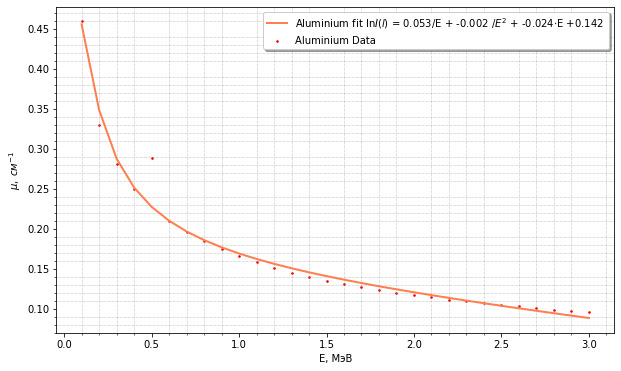

In [108]:
def approx(x, a, b, c, d):
    return a / x + b/x/x + c*x +d
beta_opt1, beta_cov1 = curve_fit(approx, e, al)
a = beta_opt1[0]
b = beta_opt1[1]
c = beta_opt1[2]
d = beta_opt1[3]


print('a = ', a)
print('b = ', b)
print('c = ', c)
print('d = ', d)


#получим погрешности для коэффициентов
sigma_a = np.sqrt(beta_cov1[0,0])
sigma_b = np.sqrt(beta_cov1[1,1])
sigma_c = np.sqrt(beta_cov1[2,2])
sigma_d = np.sqrt(beta_cov1[3,3])


print('sigma_a = ', sigma_a)
print('sigma_b = ', sigma_b)
print('sigma_c = ', sigma_c)
print('sigma_d = ', sigma_d)


residuals1 = al - approx(e,*beta_opt1)
fres1 = sum(residuals1**2)
S_e = np.sqrt(fres1/len(e))
print('S_e = ', S_e)


print('Relative S_r a = % ', 100* sigma_a/abs(a))
print('Relative S_r b = % ', 100* sigma_b/abs(b))
print('Relative S_r c = % ', 100* sigma_c/abs(c))
print('Relative S_r d = % ', 100* sigma_d/abs(d))



# график
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(e, approx(e, *beta_opt1), 'coral', lw = 2)
ax.scatter(e, al, marker = '.', color = 'red', s = 10)
lgnd = ax.legend([r'Aluminium fit $\ln{I}(l)$ = %.3f/E + %.3f /$E^2$ + %.3f$\cdot$E +%.3f ' %(a,b,c,d), 'Aluminium Data'], loc='upper right', shadow=True)

# ax.set_title(r'График Ферми')
ax.set_ylabel(r'$\mu, \; см^{-1}$')
ax.set_xlabel(r'E, МэВ')

ax.grid(which='major',
color = 'k')

ax.minorticks_on()

ax.grid(which='minor',
color = 'gray',
linestyle = ':', linewidth = 0.5)

ax.grid(which='major', linewidth = 0.5)
# plt.errorbar(e, al, fmt = 'ro', marker = '.', markersize = '4', capsize = 4, elinewidth = 2, capthick = 2, ecolor = 'violet')


# plt.xlim (-10, 850)
# plt.ylim (-10, 245)
plt.savefig('al_e.png', dpi=400, quality=100)
plt.show()

a =  0.15120538110010479
b =  0.1978883122502333
c =  0.041300379532272814
d =  0.4004861380152693
sigma_a =  0.016229979487783385
sigma_b =  0.005142481823192618
sigma_c =  0.0003700801673734958
sigma_d =  0.009644358604586439
S_e =  0.018328033782381774
Relative S_r a = %  10.733731412004714
Relative S_r b = %  2.598678903628153
Relative S_r c = %  0.8960696525423185
Relative S_r d = %  2.4081629023121716


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:68: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later


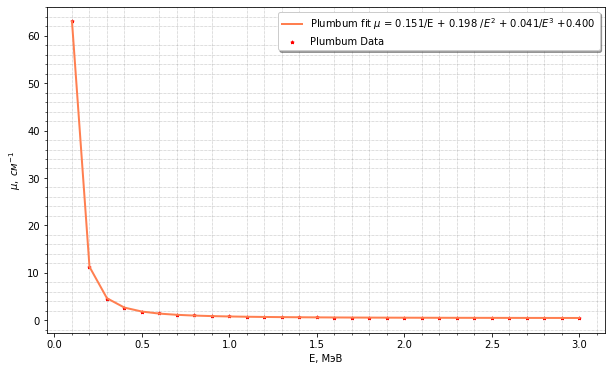

In [104]:
def approx(x, a, b, c, d):
    return a / x + b/x/x + c/x/x/x +d
beta_opt1, beta_cov1 = curve_fit(approx, e, pb)
a = beta_opt1[0]
b = beta_opt1[1]
c = beta_opt1[2]
d = beta_opt1[3]


print('a = ', a)
print('b = ', b)
print('c = ', c)
print('d = ', d)


#получим погрешности для коэффициентов
sigma_a = np.sqrt(beta_cov1[0,0])
sigma_b = np.sqrt(beta_cov1[1,1])
sigma_c = np.sqrt(beta_cov1[2,2])
sigma_d = np.sqrt(beta_cov1[3,3])


print('sigma_a = ', sigma_a)
print('sigma_b = ', sigma_b)
print('sigma_c = ', sigma_c)
print('sigma_d = ', sigma_d)


residuals1 = pb - approx(e,*beta_opt1)
fres1 = sum(residuals1**2)
S_e = np.sqrt(fres1/len(e))
print('S_e = ', S_e)


print('Relative S_r a = % ', 100* sigma_a/abs(a))
print('Relative S_r b = % ', 100* sigma_b/abs(b))
print('Relative S_r c = % ', 100* sigma_c/abs(c))
print('Relative S_r d = % ', 100* sigma_d/abs(d))



# график
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(e, approx(e, *beta_opt1), 'coral', lw = 2)
ax.scatter(e, pb, marker = '*', color = 'red', s = 10)
lgnd = ax.legend([r'Plumbum fit $\mu$ = %.3f/E + %.3f /$E^2$ + %.3f/$E^3$ +%.3f ' %(a,b,c,d), 'Plumbum Data'], loc='upper right', shadow=True)

# ax.set_title(r'График Ферми')
ax.set_ylabel(r'$\mu, \; см^{-1}$')
ax.set_xlabel(r'E, МэВ')

ax.grid(which='major',
color = 'k')

ax.minorticks_on()

ax.grid(which='minor',
color = 'gray',
linestyle = ':', linewidth = 0.5)

ax.grid(which='major', linewidth = 0.5)



# plt.xlim (-10, 850)
# plt.ylim (-10, 245)
plt.savefig('pb_e.png', dpi=400, quality=100)
plt.show()

a =  0.15120538110010479
b =  0.1978883122502333
c =  0.041300379532272814
d =  0.4004861380152693
sigma_a =  0.016229979487783385
sigma_b =  0.005142481823192618
sigma_c =  0.0003700801673734958
sigma_d =  0.009644358604586439
S_e =  0.018328033782381774
Relative S_r a = %  10.733731412004714
Relative S_r b = %  2.598678903628153
Relative S_r c = %  0.8960696525423185
Relative S_r d = %  2.4081629023121716


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:68: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later


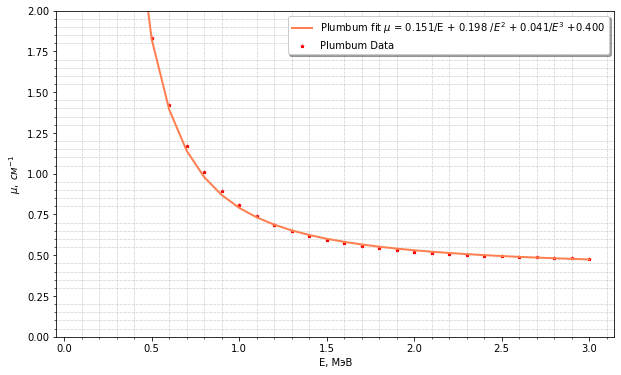

In [103]:
def approx(x, a, b, c, d):
    return a / x + b/x/x + c/x/x/x +d
beta_opt1, beta_cov1 = curve_fit(approx, e, pb)
a = beta_opt1[0]
b = beta_opt1[1]
c = beta_opt1[2]
d = beta_opt1[3]


print('a = ', a)
print('b = ', b)
print('c = ', c)
print('d = ', d)


#получим погрешности для коэффициентов
sigma_a = np.sqrt(beta_cov1[0,0])
sigma_b = np.sqrt(beta_cov1[1,1])
sigma_c = np.sqrt(beta_cov1[2,2])
sigma_d = np.sqrt(beta_cov1[3,3])


print('sigma_a = ', sigma_a)
print('sigma_b = ', sigma_b)
print('sigma_c = ', sigma_c)
print('sigma_d = ', sigma_d)


residuals1 = pb - approx(e,*beta_opt1)
fres1 = sum(residuals1**2)
S_e = np.sqrt(fres1/len(e))
print('S_e = ', S_e)


print('Relative S_r a = % ', 100* sigma_a/abs(a))
print('Relative S_r b = % ', 100* sigma_b/abs(b))
print('Relative S_r c = % ', 100* sigma_c/abs(c))
print('Relative S_r d = % ', 100* sigma_d/abs(d))



# график
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(e, approx(e, *beta_opt1), 'coral', lw = 2)
ax.scatter(e, pb, marker = '*', color = 'red', s = 10)
lgnd = ax.legend([r'Plumbum fit $\mu$ = %.3f/E + %.3f /$E^2$ + %.3f/$E^3$ +%.3f ' %(a,b,c,d), 'Plumbum Data'], loc='upper right', shadow=True)

# ax.set_title(r'График Ферми')
ax.set_ylabel(r'$\mu, \; см^{-1}$')
ax.set_xlabel(r'E, МэВ')

ax.grid(which='major',
color = 'k')

ax.minorticks_on()

ax.grid(which='minor',
color = 'gray',
linestyle = ':', linewidth = 0.5)

ax.grid(which='major', linewidth = 0.5)



# plt.xlim (-10, 850)
plt.ylim (0, 2)
plt.savefig('pb_e2.png', dpi=400, quality=100)
plt.show()

a =  0.313736893354575
b =  -0.04579269459203206
c =  0.004181887056401092
d =  0.19077007322420111
sigma_a =  0.005883371406083206
sigma_b =  0.001864150982439805
sigma_c =  0.0001341541541412358
sigma_d =  0.003496082251593639
S_e =  0.006643916585272851
Relative S_r a = %  1.8752564746773392
Relative S_r b = %  4.070847979241143
Relative S_r c = %  3.2079812852881804
Relative S_r d = %  1.8326156679118608


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:68: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later


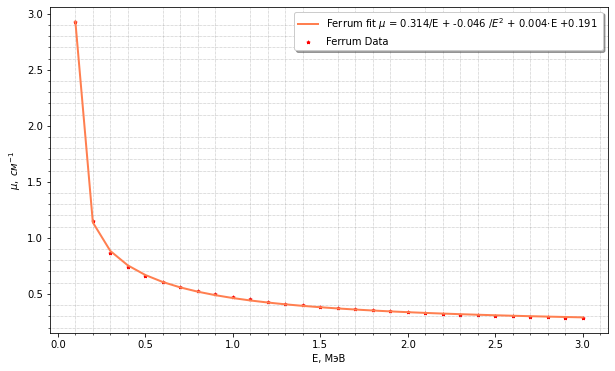

In [95]:
def approx(x, a, b, c, d):
    return a / x + b/x/x + c/x/x/x +d
beta_opt1, beta_cov1 = curve_fit(approx, e, fe)
a = beta_opt1[0]
b = beta_opt1[1]
c = beta_opt1[2]
d = beta_opt1[3]


print('a = ', a)
print('b = ', b)
print('c = ', c)
print('d = ', d)


#получим погрешности для коэффициентов
sigma_a = np.sqrt(beta_cov1[0,0])
sigma_b = np.sqrt(beta_cov1[1,1])
sigma_c = np.sqrt(beta_cov1[2,2])
sigma_d = np.sqrt(beta_cov1[3,3])


print('sigma_a = ', sigma_a)
print('sigma_b = ', sigma_b)
print('sigma_c = ', sigma_c)
print('sigma_d = ', sigma_d)


residuals1 = fe - approx(e,*beta_opt1)
fres1 = sum(residuals1**2)
S_e = np.sqrt(fres1/len(e))
print('S_e = ', S_e)


print('Relative S_r a = % ', 100* sigma_a/abs(a))
print('Relative S_r b = % ', 100* sigma_b/abs(b))
print('Relative S_r c = % ', 100* sigma_c/abs(c))
print('Relative S_r d = % ', 100* sigma_d/abs(d))



# график
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(e, approx(e, *beta_opt1), 'coral', lw = 2)
ax.scatter(e, fe, marker = '*', color = 'red', s = 10)
lgnd = ax.legend([r'Ferrum fit $\mu$ = %.3f/E + %.3f /$E^2$ + %.3f$\cdot$E +%.3f ' %(a,b,c,d), 'Ferrum Data'], loc='upper right', shadow=True)

# ax.set_title(r'График Ферми')
ax.set_ylabel(r'$\mu, \; см^{-1}$')
ax.set_xlabel(r'E, МэВ')

ax.grid(which='major',
color = 'k')

ax.minorticks_on()

ax.grid(which='minor',
color = 'gray',
linestyle = ':', linewidth = 0.5)

ax.grid(which='major', linewidth = 0.5)
# plt.errorbar(e, fe, fmt = 'ro', marker = '*', markersize = '4', capsize = 4, elinewidth = 2, capthick = 2, ecolor = 'violet')


# plt.xlim (-10, 850)
# plt.ylim (-10, 245)
plt.savefig('fe_e.png', dpi=400, quality=100)
plt.show()

In [116]:
np.array([0.48, .5, 0.68]).std()

0.08993825042154698